<L>Essa é minha primeira experiência com modelos de aprendizado de máquina, modelagem de dados e qualquer coisa relacionado a dados no geral. Eu fiquei muito confuso e as coisas talvez não tenham sido feitas do jeito ideal, mas elas funcionam no final.

<L>A maior parte do processamento foi feito em cima das próprias arrays no python. Está tudo comentado e de fácil entendimento, as funções tem nomes intuitivos e as células estão bem divididas neste notebook jupyter.<L>

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import metrics
import numpy as np
import seaborn as sns


In [94]:
train_data = pd.read_csv("c:/Users/breno/Desktop/datamining/train.csv")
test_data = pd.read_csv("c:/Users/breno/Desktop/datamining/test.csv")
mydata = [train_data, test_data]

<L>Análise exploratória<l>


In [95]:
for df in mydata:
    duplicates = df.duplicated()
    print(df[duplicates])

Empty DataFrame
Columns: [id, Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []
Empty DataFrame
Columns: [id, Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS]
Index: []


In [96]:
for df in mydata:
    print(df.isnull().sum())

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC           

<L>SEM DADOS FALTANTES<L>

A partir de agora, farei um teste inicial para entender quais os modelos que provavelmente são mais adequados para esta atividade e quais as labels devo usar. Testarei formas diferentes de encodar os dados e os 2 melhores modelos para cada uma das opções

In [97]:
#Definição de dicionários: serão usados como labels e no caso dos classifiers para treinar o modelo

frequency_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

boolean_mapping = {
    'no' : 0,
    'yes' : 1
}

gender_mapping = {
    'Male' : 0,
    'Female' : 1
}

transport_mapping = {
    'Walking' : 0,
    'Bike' : 1,
    'Public_Transportation' : 2,
    'Motorbike' : 3,
    'Automobile' : 4
}

NObeyes_mapping = {
    'Insufficient_Weight' : 0,
    'Normal_Weight' : 1,
    'Overweight_Level_I' : 2, 
    'Overweight_Level_II': 3,
    'Obesity_Type_I' : 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III' : 6
}

classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(),
    "GaussianNaiveBayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier()
}

In [98]:
def apply_label_encoding(df, column_index, mapping):
    column_name = df.columns[column_index]
    df[column_name] = df[column_name].map(mapping)


In [99]:
# Apply the mappings to the DataFrames
for df in [train_data, test_data]:
    apply_label_encoding(df, 1, gender_mapping)  # 0 + 1
    apply_label_encoding(df, 5, boolean_mapping)  # 4 + 1
    apply_label_encoding(df, 6, boolean_mapping)  # 5 + 1
    apply_label_encoding(df, 9, frequency_mapping)  # 8 + 1
    apply_label_encoding(df, 10, boolean_mapping)  # 9 + 1
    apply_label_encoding(df, 12, boolean_mapping)  # 11 + 1
    apply_label_encoding(df, 15, frequency_mapping)  # 14 + 1
    apply_label_encoding(df, 16, transport_mapping)  # 15 + 1

apply_label_encoding(train_data, 17, NObeyes_mapping)  # 16 + 1

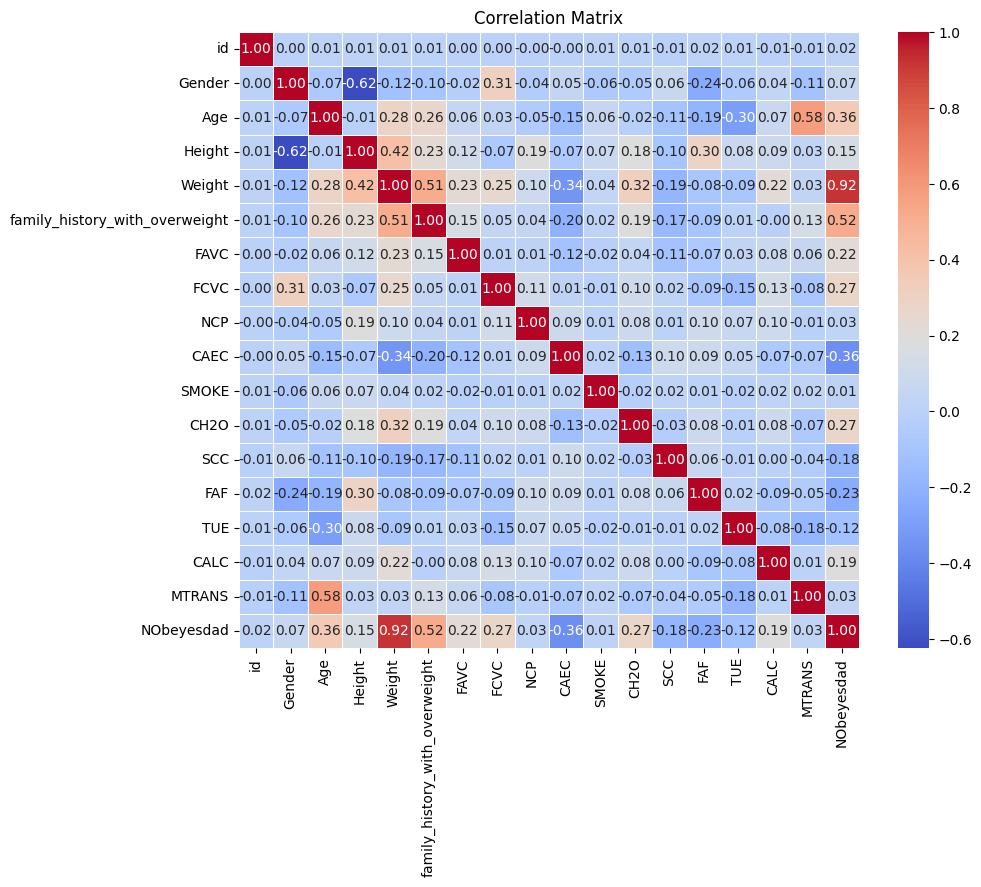

In [115]:
correlation_matrix = train_data.corr()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [110]:
# Separando o target da base de treino para testarmos os modelos

y = train_data.iloc[:, -1]
trainnox = train_data.iloc[:, :-1]

In [112]:
#Separando a base de treino em teste e treino. Isso é para testar os modelos e ver o mais adequado
X_train, X_test, y_train, y_test = train_test_split(trainnox, y, test_size=0.2, random_state=42)


In [113]:
# Fazendo o scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
# Testando a acurácia dos diferentes classificadores. Inclui matrizes de confusão
matrizes = []
for name, clf in classifiers.items():
    print(f"Training {name}, {clf}...")
    # Train the classifier
    clf.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test_scaled)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy:", accuracy)


Training Decision Tree, DecisionTreeClassifier()...
Decision Tree Accuracy: 0.8422447013487476
Training Random Forest, RandomForestClassifier()...
Random Forest Accuracy: 0.8940269749518305
Training SVM, SVC()...
SVM Accuracy: 0.8610308285163777
Training K-Nearest Neighbors, KNeighborsClassifier()...
K-Nearest Neighbors Accuracy: 0.7196531791907514
Training Neural Network, MLPClassifier()...


C:\Users\breno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 0.8665703275529865
Training GaussianNaiveBayes, GaussianNB()...
GaussianNaiveBayes Accuracy: 0.6628131021194605
Training XGBoost, XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)...
XGBoost Accuracy: 0.8998073217726397


<l>Os melhores modelos foram o de Random Forests e o XGBoost. Iremos testar formas de melhorá-los a partir de agora

O primeiro passo será ver as matrizes de confusão para ambos os métodos<l>

Training Random Forest, RandomForestClassifier()...
Random Forest Accuracy: 0.8942678227360308
Training XGBoost, XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)...
XGBoost Accuracy: 0.8998073217726397
('Random Forest', <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object a

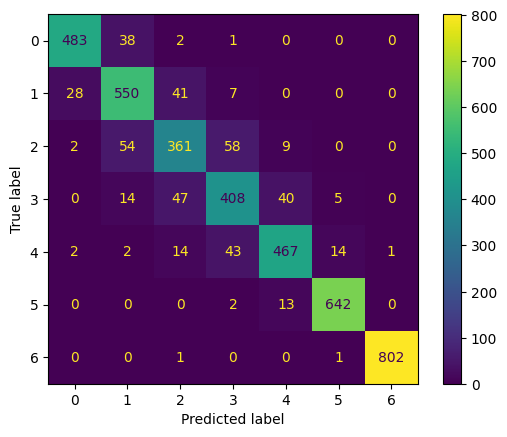

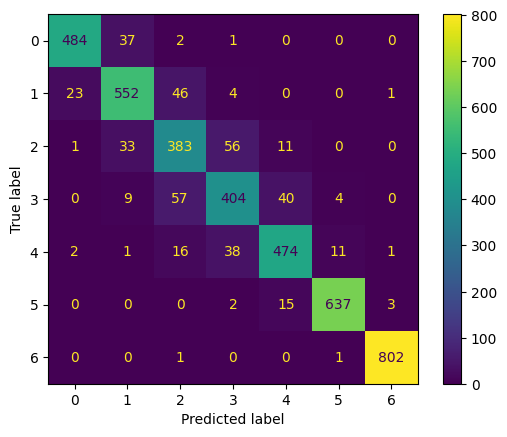

In [117]:
modelosadequados = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

for name, clf in modelosadequados.items():
    print(f"Training {name}, {clf}...")
    # Train the classifier
    clf.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test_scaled)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy:", accuracy)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1', '2', '3', '4', '5', '6'])
    matrizes += [(name, cm_display.plot())]
for x in matrizes:
    print(x)

<L> O XGB no geral gerou mais erros de falso negativo, o que é o mais perigoso. O melhor aqui é experimentar com o random forests.

In [20]:
#Scaling dos dados de teste
test_scaled = scaler.transform(test_data)
train_scaled = scaler.fit_transform(train_data)


rf = RandomForestClassifier()
rf.fit(train_scaled, y)
final_y = rf.predict(test_scaled)


# Define the reverse mapping for NObeyesdad classes
reverse_NObeyes_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
    # Add more mappings if needed
}


test_ids = [row[0] for row in test_data]


# Map the integer predictions back to NObeyesdad classes
y_pred_classes = [reverse_NObeyes_mapping[prediction] for prediction in final_y]


In [21]:

import csv

# Specify the file path where you want to save the predictions
output_file = "/myfiles/submission.csv"

# Write the predicted values to a CSV file in the required format
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'NObeyesdad'])  # Write header
    for id_value, prediction_class in zip(test_ids, y_pred_classes):
        writer.writerow([id_value, prediction_class])